## Python3 script that process and visualize data given in "Combined_data.csv" ##

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import configparser

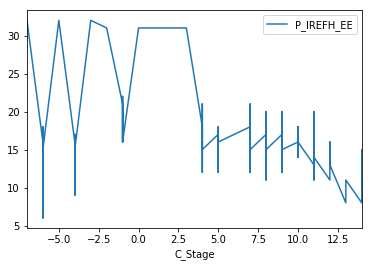

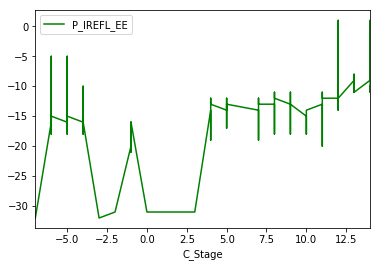

In [2]:
datFrame = pd.read_csv("Combined_data.csv")
#datFrame.replace({"No_Device": np.nan=}) 
datFrame[datFrame.P_IREFL_EE == "No_Device"] = np.nan
#datFrame = datFrame.dropna()

conf = configparser.ConfigParser()
conf.read('config.ini',encoding='utf-8')

datFrame = datFrame[pd.notnull(datFrame[conf['SimpleValues']['FirstGraph']])]
datFrame = datFrame[pd.notnull(datFrame[conf['SimpleValues']['SecGraph']])]

datFrame[conf['SimpleValues']['FirstGraph']] = pd.to_numeric(datFrame[conf['SimpleValues']['FirstGraph']])
datFrame[conf['SimpleValues']['SecGraph']] = pd.to_numeric(datFrame[conf['SimpleValues']['SecGraph']])

#datFrame = datFrame['P_IREFL_EE'].notnull()

P_IREFL_EE = datFrame.plot.line(x = "C_Stage", y = conf['SimpleValues']['FirstGraph'])
P_IREFH_EE = datFrame.plot.line(x = "C_Stage", y = conf['SimpleValues']['SecGraph'], color="green")


## Plot of P_IREFL versus a production stage number ##

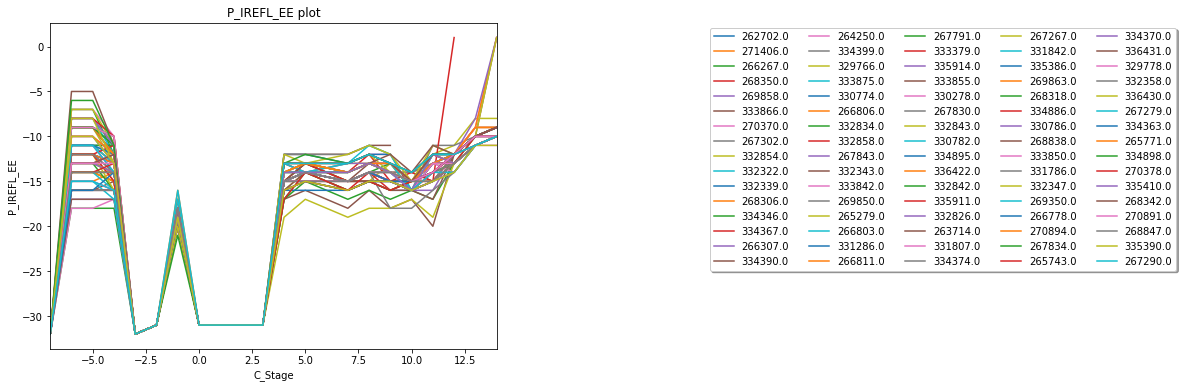

In [3]:
#datFrame
graph = plt.gca()
plt.figure(1)
temp_set = set() #in order to not draw repeatings chips more than one time
temp_set = set(datFrame.ChipID)
for col in datFrame.ChipID:
    if col in temp_set:
        temp1 = datFrame[datFrame.ChipID == col]
        temp1.plot.line(x = "C_Stage", y = conf['SimpleValues']['SecGraph'], title =conf['SimpleValues']['SecGraph'] + " plot", figsize={8,6},label = col, ax = graph)
        temp_set.remove(col)
        
plt.ylabel(conf['SimpleValues']['SecGraph'])
chartBox = graph.get_position()
graph.set_position([chartBox.x0, chartBox.y0, chartBox.width, chartBox.height])
graph.legend(loc='upper center', bbox_to_anchor=(2, 1), shadow=True, ncol=5)
plt.show()

## Plot of P_IREFH versus a production stage number ##

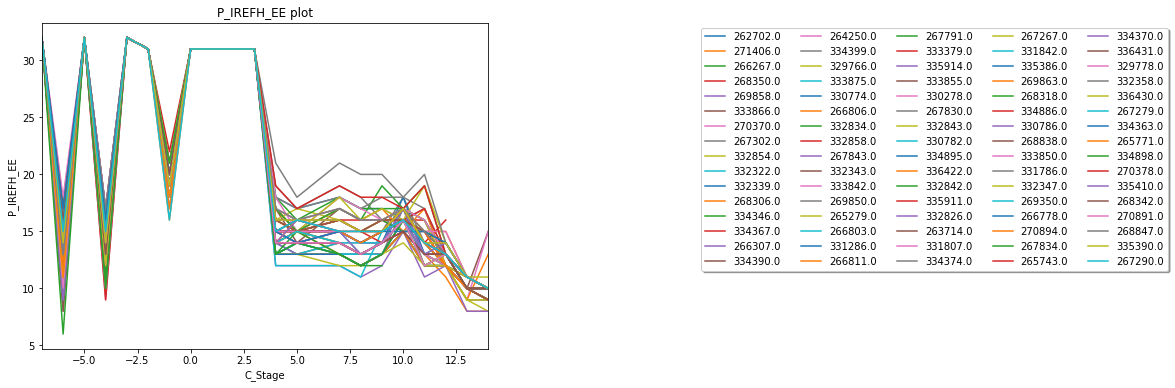

In [12]:
plt.figure(2)
graph2 = plt.gca()
temp_set = set(datFrame.ChipID)
for col in datFrame.ChipID:
    if col in temp_set:
        temp2 = datFrame[datFrame.ChipID == col]
        temp2.plot.line(x = "C_Stage", y = conf['SimpleValues']['FirstGraph'], title =conf['SimpleValues']['FirstGraph']+ " plot", figsize={8,6}, label = col, ax = graph2)
        temp_set.remove(col)
plt.ylabel(conf['SimpleValues']['FirstGraph']) 
chartBox = graph2.get_position()
graph2.set_position([chartBox.x0, chartBox.y0, chartBox.width, chartBox.height])
graph2.legend(loc='upper center', bbox_to_anchor=(2, 1), shadow=True, ncol=5)
plt.show()

### Histogram of the P_IREFL_EE P_IREFH_EE values across all the chips on the first and the last stage of production ###

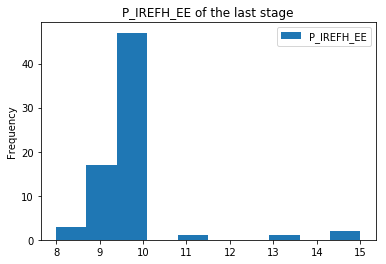

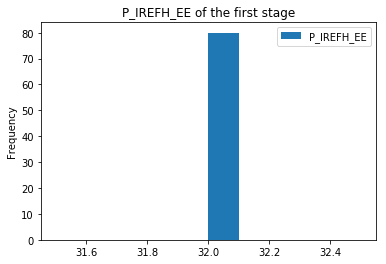

In [5]:

df_temp = datFrame[datFrame.C_Stage == datFrame.C_Stage.max()]
df_temp.plot.hist(y=conf['SimpleValues']['FirstGraph'], x="C_Stage", title = conf['SimpleValues']['FirstGraph'] + " of the last stage")
df_temp1 = datFrame[datFrame.C_Stage == datFrame.C_Stage.min()]
df_temp1.plot.hist(y=conf['SimpleValues']['FirstGraph'], x="C_Stage", title = conf['SimpleValues']['FirstGraph'] + " of the first stage")
plt.show()

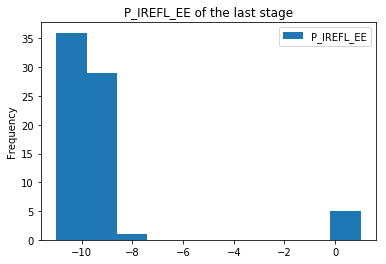

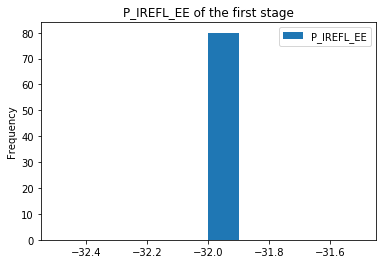

In [6]:
df_temp2 = datFrame[datFrame.C_Stage == datFrame.C_Stage.max()]
df_temp2.plot.hist( y=conf['SimpleValues']['SecGraph'], x="C_Stage", title = conf['SimpleValues']['SecGraph'] + " of the last stage")
df_temp3 = datFrame[datFrame.C_Stage == datFrame.C_Stage.min()]
df_temp3.plot.hist(y=conf['SimpleValues']['SecGraph'], x="C_Stage", title = conf['SimpleValues']['SecGraph'] + " of the first stage")
plt.show()

## Here you can alter number of stages, to build histogram##

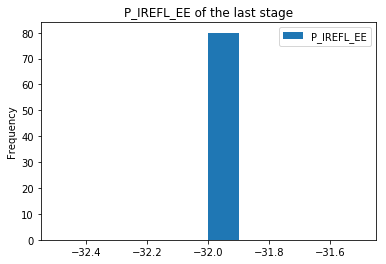

In [11]:
df_temp3 = datFrame[datFrame.C_Stage == float(conf['Hist']['stage_num'])]
df_temp3.plot.hist( y=conf['SimpleValues']['SecGraph'], x="C_Stage", title = conf['SimpleValues']['SecGraph'] + " of the last stage")
plt.show()

## Use set to define ChipID that u want to work with


In [10]:
temp_set = {331842.0,335386.0,269863.0,268318.0,334886.0,330786.0,268838.0,333850.0,331786.0,332347.0,269350.0,266778.0,270894.0,267834.0,265743.0,334370.0}
df = pd.DataFrame()
csv_df = pd.DataFrame()
for numb in temp_set:
    temp = datFrame.loc[datFrame.ChipID == numb]
    df = df.append(temp, ignore_index = True)
# data to work with is stored i csv-file 
#uncomment if you need csv
# csv_df = df
# csv_df.to_csv("File.csv") 
df

,ChipID,C_Bake[h],C_Stage,C_Temp,C_Cond,P_DeviceName,P_IREFL_EE,P_IREFH_EE,P_IREFL_FLASH,P_IREFH_FLASH
0,331842.0,NaN,-7.0,35.0,PR1,54,-32,32,-26,9
1,331842.0,NaN,-6.0,150.0,PR2,54,-11,11,-28,13
2,331842.0,NaN,-5.0,150.0,PR2,54,-11,32,-14,16
3,331842.0,NaN,-4.0,150.0,PR3,54,-12,13,-14,12
4,331842.0,NaN,-3.0,-40.0,FT1,54,-32,32,-24,8
5,331842.0,NaN,-2.0,-40.0,FT1,54,-31,31,NaN,8
6,331842.0,NaN,-1.0,125.0,FT2,54,-19,19,NaN,NaN
7,331842.0,NaN,0.0,35.0,INIT,NaN,-31,31,NaN,NaN
8,331842.0,NaN,1.0,35.0,RELIABILITY35,54,-31,31,NaN,NaN
9,331842.0,NaN,2.0,150.0,RELIABILITY150,54,-31,31,NaN,NaN
